Importing the necessary Libraries
1. NumPy (numpy) – Provides support for large, multi-dimensional arrays and numerical operations.
2. Pandas (pandas) – A data analysis and manipulation library for handling structured data.
3. Seaborn (seaborn) – Statistical data visualization library built on top of Matplotlib.
4. Matplotlib (matplotlib.pyplot) – A plotting library for creating static, animated, and interactive visualizations.
5. Plotly (plotly.express, plotly.graph_objects) – Interactive plotting library for creating dynamic visualizations.
6. Scikit-learn (sklearn.metrics) – Provides evaluation metrics for machine learning models.
7. Scikit-learn (sklearn.model_selection) – Contains functions for splitting datasets and model validation.
8. Scikit-learn (sklearn.linear_model) – Implements linear regression models like Ridge, Lasso, and ElasticNet.
9. Scikit-learn (sklearn.pipeline) – Used to create machine learning pipelines for preprocessing and modeling.
10. Scikit-learn (sklearn.preprocessing) – Provides tools for scaling, normalizing, and transforming data.
11. Scikit-learn (sklearn.decomposition) – Implements dimensionality reduction techniques like PCA.
12. Scikit-learn (sklearn.impute) – Handles missing data using imputation techniques.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

**The problem statement in Kaggle published by MIT has given us two datasets one to train and another to test**

In [2]:
# loading the data
train_data  = pd.read_csv("train.csv")
test_data  = pd.read_csv("test.csv")

In [3]:
# Understanding train data
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


We are not given sales price in test data which we have to find it from out model

In [4]:
# Understanding test data
test_data
# here we are missing with sales price which we have it in training data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
# getting more into what columns are
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Dropping ID column as it is not going to be useful for training our model

In [6]:
# we can drop ID as I think its of no use 
train_data.drop(columns=["Id"],inplace=True)

In [7]:
# describing data
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**The histogram shows that house prices are right-skewed, meaning most houses are in the lower price range, with fewer expensive homes. The peak occurs around 100k-200k, indicating that most homes fall within this range. There are outliers beyond 500k, suggesting a few high-value properties. This skewness may require log transformation for better modeling**

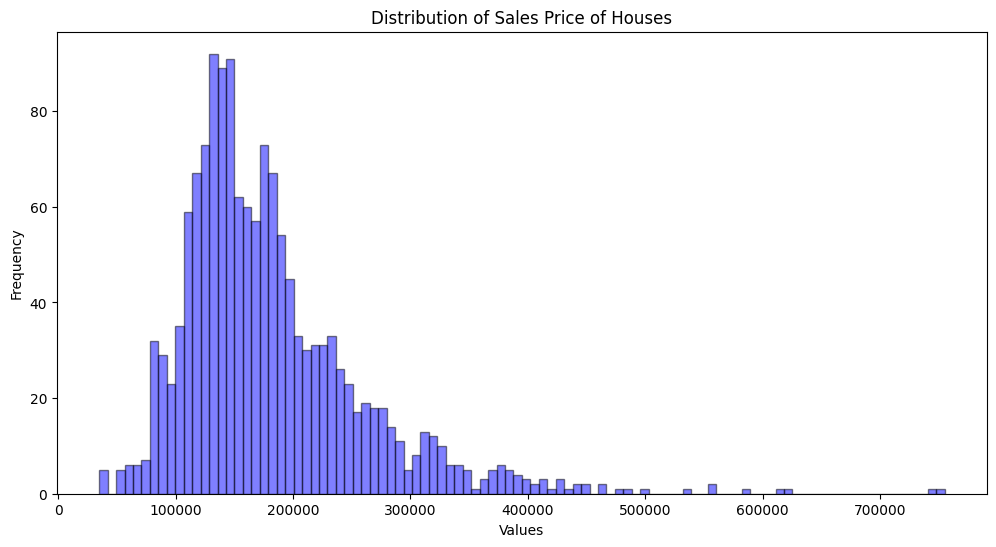

In [8]:
plt.figure(figsize=(12, 6))  # Set figure size
plt.hist(train_data["SalePrice"], bins=100, alpha=0.5, color='blue', edgecolor='black')

# Set titles and labels
plt.title("Distribution of Sales Price of Houses")
plt.xlabel("Values")
plt.ylabel("Frequency")

# Show the plot
plt.show()

**This Boxplot is the pictorial representation of data points for the above kde plot**

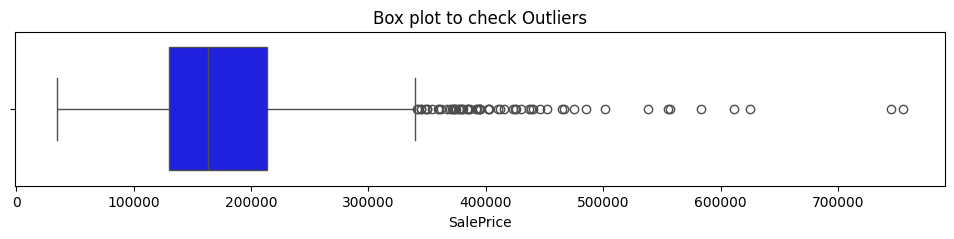

In [9]:
# checking outliers 
plt.figure(figsize=(12, 2))  # Set figure size
sns.boxplot(x=train_data["SalePrice"], color="blue")  # Box plot with blue color

# Set title
plt.title("Box plot to check Outliers")

# Show the plot
plt.show()

In [10]:
# I need to check how different features are effecting the sales price for that I'll find correlation wrt the sales price

target = "SalePrice"
correlation_scores_numerical = {}
correlation_scores_categorical = {}
numerical_columns = train_data.select_dtypes(include=["int64","float64"]).columns
categorical_columns = train_data.select_dtypes(include=["object"]).columns
for x in numerical_columns:
    if x != target:
        correlation = train_data[[x,target]].corr().iloc[0,1]
        correlation_scores_numerical[x] = round(float(correlation),2)

for x in categorical_columns:
    if x != target:
        encode = pd.get_dummies(train_data[x])
        temp = pd.concat([encode, train_data[target]],axis=1)
        correlation = temp.corr()[target].drop(target)
        correlation_scores_categorical[x] = round(float(correlation.abs().max()),2)
correlation_scores_numerical = dict(sorted(correlation_scores_numerical.items(), reverse=True, key = lambda x : x[1]))
correlation_scores_categorical = dict(sorted(correlation_scores_categorical.items(), reverse=True, key = lambda x : x[1]))
print(correlation_scores_numerical)
print(correlation_scores_categorical)

{'OverallQual': 0.79, 'GrLivArea': 0.71, 'GarageCars': 0.64, 'GarageArea': 0.62, 'TotalBsmtSF': 0.61, '1stFlrSF': 0.61, 'FullBath': 0.56, 'TotRmsAbvGrd': 0.53, 'YearBuilt': 0.52, 'YearRemodAdd': 0.51, 'GarageYrBlt': 0.49, 'MasVnrArea': 0.48, 'Fireplaces': 0.47, 'BsmtFinSF1': 0.39, 'LotFrontage': 0.35, '2ndFlrSF': 0.32, 'WoodDeckSF': 0.32, 'OpenPorchSF': 0.32, 'HalfBath': 0.28, 'LotArea': 0.26, 'BsmtFullBath': 0.23, 'BsmtUnfSF': 0.21, 'BedroomAbvGr': 0.17, 'ScreenPorch': 0.11, 'PoolArea': 0.09, 'MoSold': 0.05, '3SsnPorch': 0.04, 'BsmtFinSF2': -0.01, 'BsmtHalfBath': -0.02, 'MiscVal': -0.02, 'LowQualFinSF': -0.03, 'YrSold': -0.03, 'MSSubClass': -0.08, 'OverallCond': -0.08, 'EnclosedPorch': -0.13, 'KitchenAbvGr': -0.14}
{'ExterQual': 0.59, 'BsmtQual': 0.55, 'KitchenQual': 0.52, 'Foundation': 0.5, 'BsmtFinType1': 0.43, 'HeatingQC': 0.43, 'GarageFinish': 0.42, 'Neighborhood': 0.4, 'SaleType': 0.36, 'GarageType': 0.35, 'SaleCondition': 0.35, 'FireplaceQu': 0.34, 'MasVnrType': 0.33, 'Exterior1

In [11]:
explained_variance_numerical = []
explained_variance_categorical = []
for x in correlation_scores_numerical.values():
    variance = round(x**2 * 100,2)
    explained_variance_numerical.append(variance)
for x in correlation_scores_categorical.values():
    variance = round(x**2 * 100,2)
    explained_variance_categorical.append(variance)
print("Numerical Values Variance :",explained_variance_numerical)
print("Categorical Values Variance :",explained_variance_categorical)

Numerical Values Variance : [62.41, 50.41, 40.96, 38.44, 37.21, 37.21, 31.36, 28.09, 27.04, 26.01, 24.01, 23.04, 22.09, 15.21, 12.25, 10.24, 10.24, 10.24, 7.84, 6.76, 5.29, 4.41, 2.89, 1.21, 0.81, 0.25, 0.16, 0.01, 0.04, 0.04, 0.09, 0.09, 0.64, 0.64, 1.69, 1.96]
Categorical Values Variance : [34.81, 30.25, 27.04, 25.0, 18.49, 18.49, 17.64, 16.0, 12.96, 12.25, 12.25, 11.56, 10.89, 9.61, 9.61, 9.61, 8.41, 7.84, 7.29, 6.25, 6.25, 5.76, 5.76, 5.76, 5.29, 2.89, 1.96, 1.96, 1.96, 1.96, 1.96, 1.96, 1.69, 1.44, 1.44, 1.44, 1.44, 0.81, 0.49, 0.25, 0.25, 0.16, 0.01]


**The square of the correlation (R²) represents the proportion of variance in the target variable explained by each feature.**
**we can see here that numerical values itself can give more than 95% variance**

**There are also lot of null values that exists here and before doing anything lets remove them**
**I plotted them in form of KDE to check where the values are concentrated and hence I choose to impute it using mean**

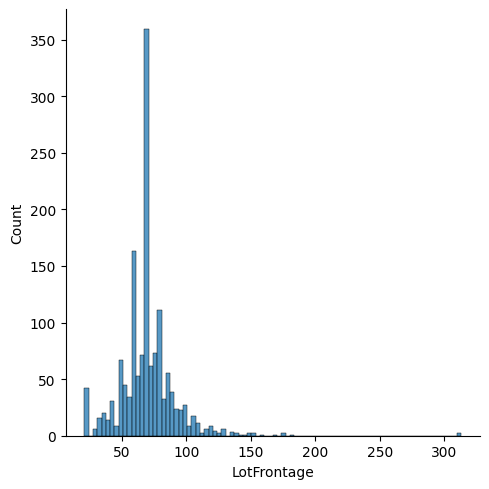

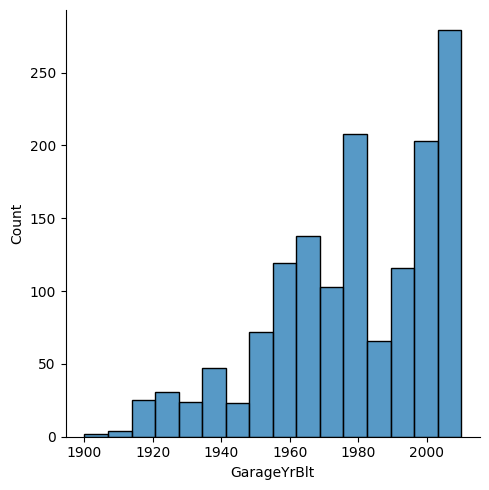

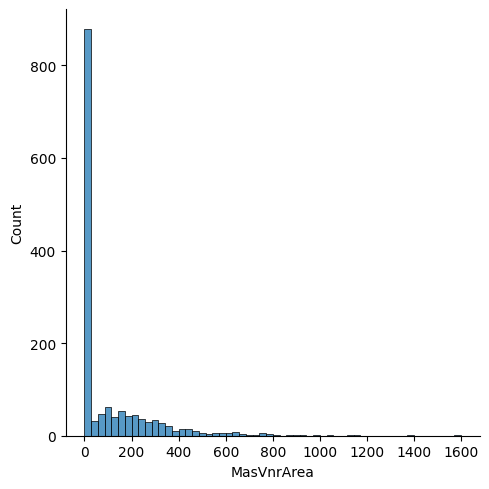

In [12]:
columns_to_impute = ["LotFrontage", "GarageYrBlt", "MasVnrArea"]

imputer = SimpleImputer(strategy="mean")

train_data[columns_to_impute] = imputer.fit_transform(train_data[columns_to_impute])
sns.displot(train_data["LotFrontage"])
sns.displot(train_data["GarageYrBlt"])
sns.displot(train_data["MasVnrArea"])

In [13]:
train_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

**Need to handle the skewness of data as I think it might improve modeling**

In [14]:
# first lets check skewness

skewness = train_data.skew(numeric_only=True)
print(skewness)
# as you can see some of the features are highly skewed lets plot them first


MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

**The histograms show the distribution of various housing-related features, with most variables exhibiting right-skewness, meaning they have a concentration of lower values and long tails toward higher values. Features like LotFrontage, LotArea, and SalePrice have noticeable skewness and potential outliers. Many variables, such as BsmtFinSF2, 3SsnPorch, and MiscVal, have a large proportion of zero values, indicating they may be sparsely populated. Transformation techniques like log transformation or normalization may be necessary for better model performance**

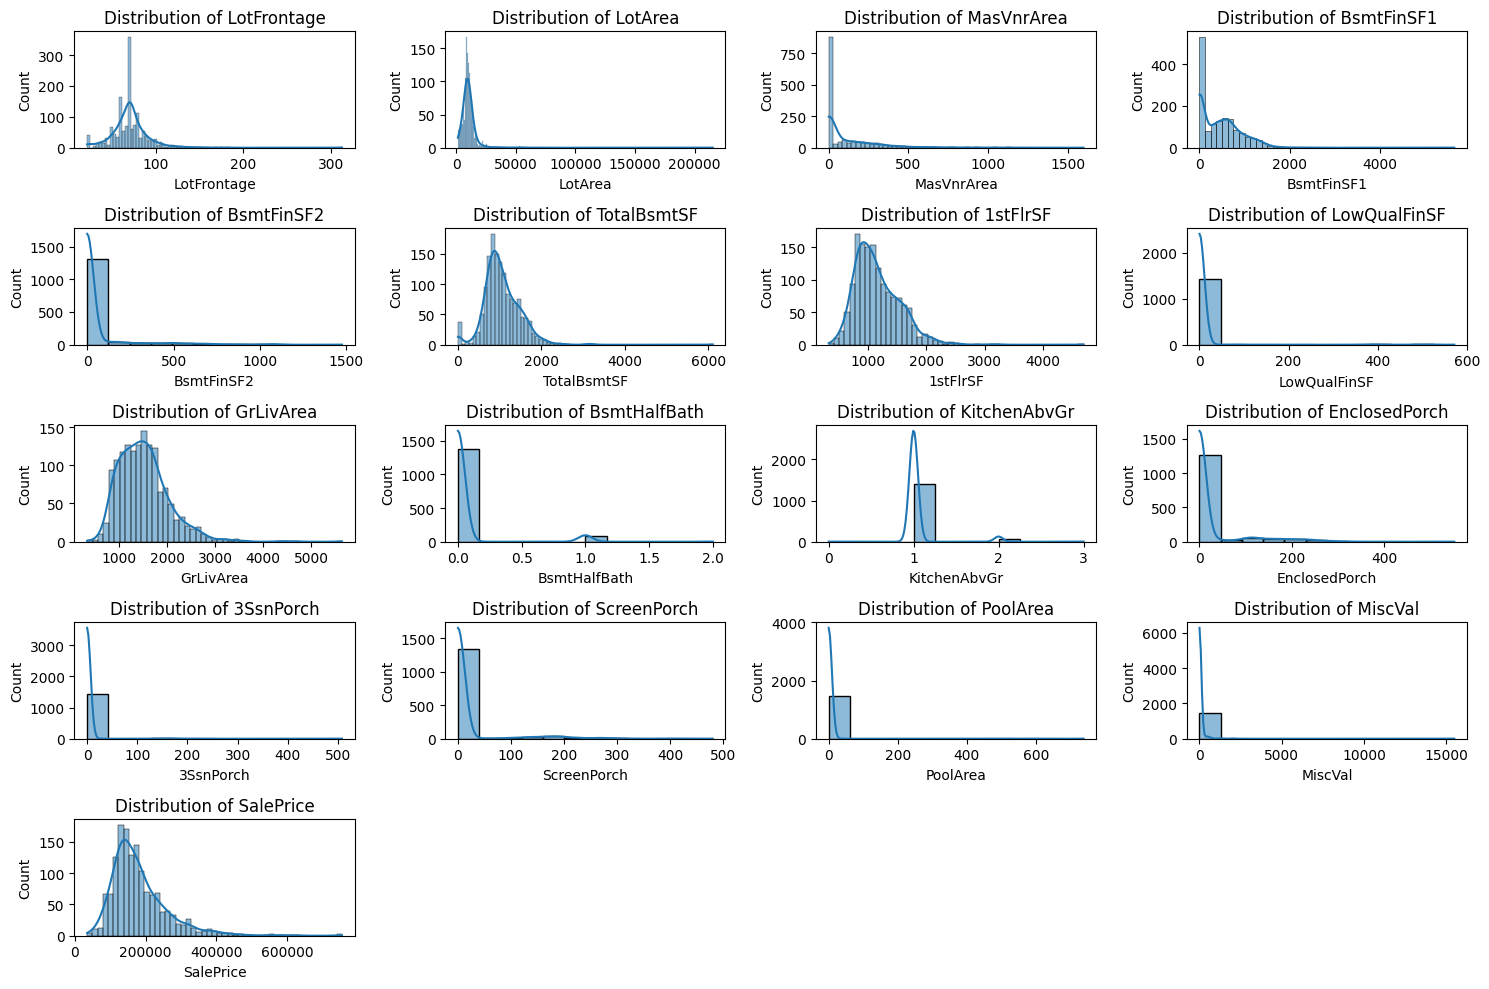

In [15]:
fig, axes = plt.subplots(5, 4, figsize=(15,10))
highly_skewed_features = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
    'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea',
    'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
    'PoolArea', 'MiscVal', 'SalePrice'
]

axes = axes.flatten()
# Plot distributions for highly skewed features
for i, col in enumerate(highly_skewed_features):
    sns.histplot(train_data[col], kde=True, ax=axes[i])  # Adjust size as needed
    axes[i].set_title(f"Distribution of {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove extra subplot
plt.tight_layout()
plt.show()

**Model Training**

**1. Linear Regression**

In [ ]:
# Working on training data

X = train_data.drop(columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition','SalePrice'])
Y = train_data["SalePrice"]
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=1111)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 36)
(365, 36)
(1095,)
(365,)


In [17]:
x_train.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [18]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = LinearReg.predict(x_test)

In [20]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 899975181.8700166
Root Mean Squared Error (RMSE): 29999.586361648664
Mean Absolute Error (MAE): 21395.511435810524
R-squared (R2): 0.8520180686608383


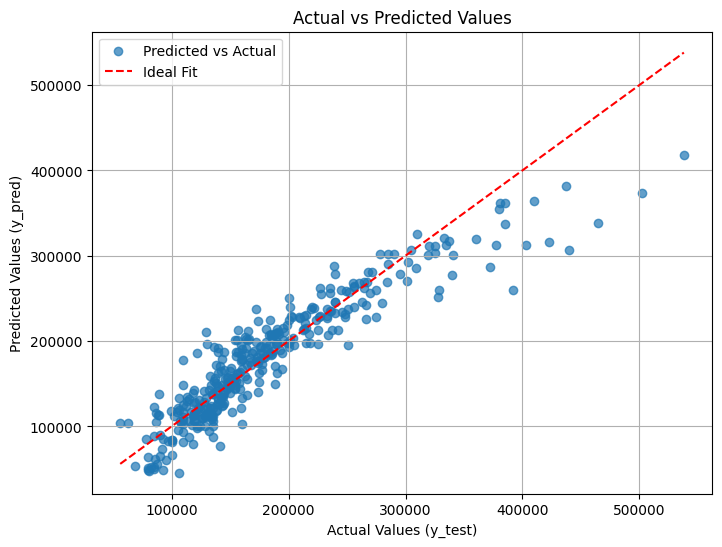

In [21]:
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual")

# Add the ideal best-fit line (diagonal line y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Ideal Fit")

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()

**The scatter plot demonstrates a strong positive correlation between actual and predicted values, indicating that the model performs well in capturing the underlying pattern. The majority of points lie close to the red ideal fit line, suggesting that predictions are generally accurate. However, some dispersion around the line indicates minor prediction errors, which could be due to model bias, variance, or noise in the data.**

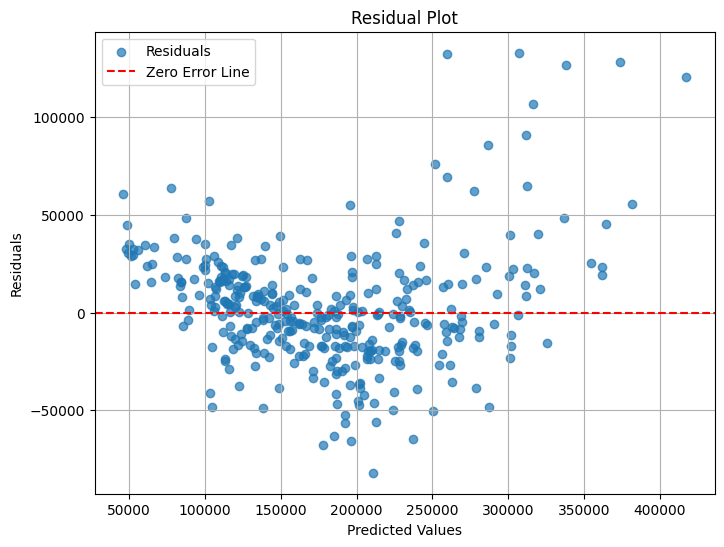

In [22]:
Ridge_residuals = y_test - y_pred
plt.figure(figsize=(8, 6))

# Residuals plot
plt.scatter(y_pred, Ridge_residuals, alpha=0.7, label="Residuals")
plt.axhline(0, color="red", linestyle="--", label="Zero Error Line")

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.grid()
plt.show()

**The residual plot shows the difference between actual and predicted values, helping to assess model accuracy. The residuals are randomly scattered around the zero error line, suggesting that the model does not exhibit strong bias. However, there is some spread in residuals, indicating small prediction errors that could be due to variance in the data. The absence of a clear pattern suggests that the model captures most trends well**

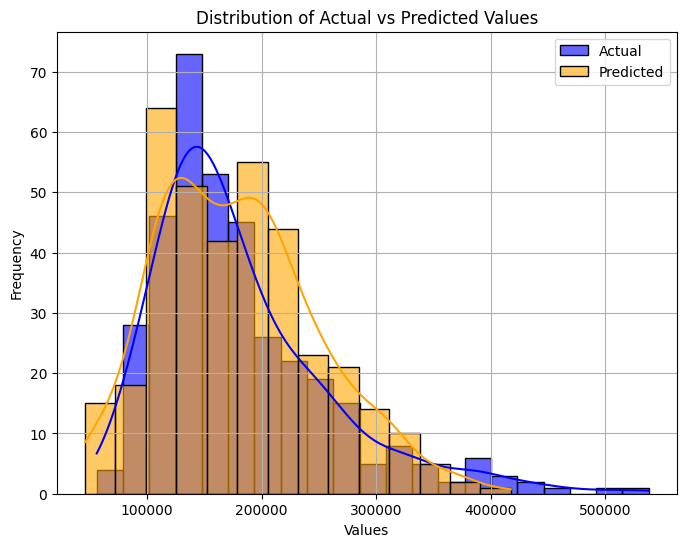

In [23]:
plt.figure(figsize=(8, 6))

sns.histplot(y_test, kde=True, color="blue", label="Actual", alpha=0.6)
sns.histplot(y_pred, kde=True, color="orange", label="Predicted", alpha=0.6)

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()

**The model does a great job capturing the overall trend of house prices, with predicted values (orange) closely following actual values (blue). It successfully learns the distribution, though there are slight deviations—some overestimation at lower prices and underestimation at higher prices.**

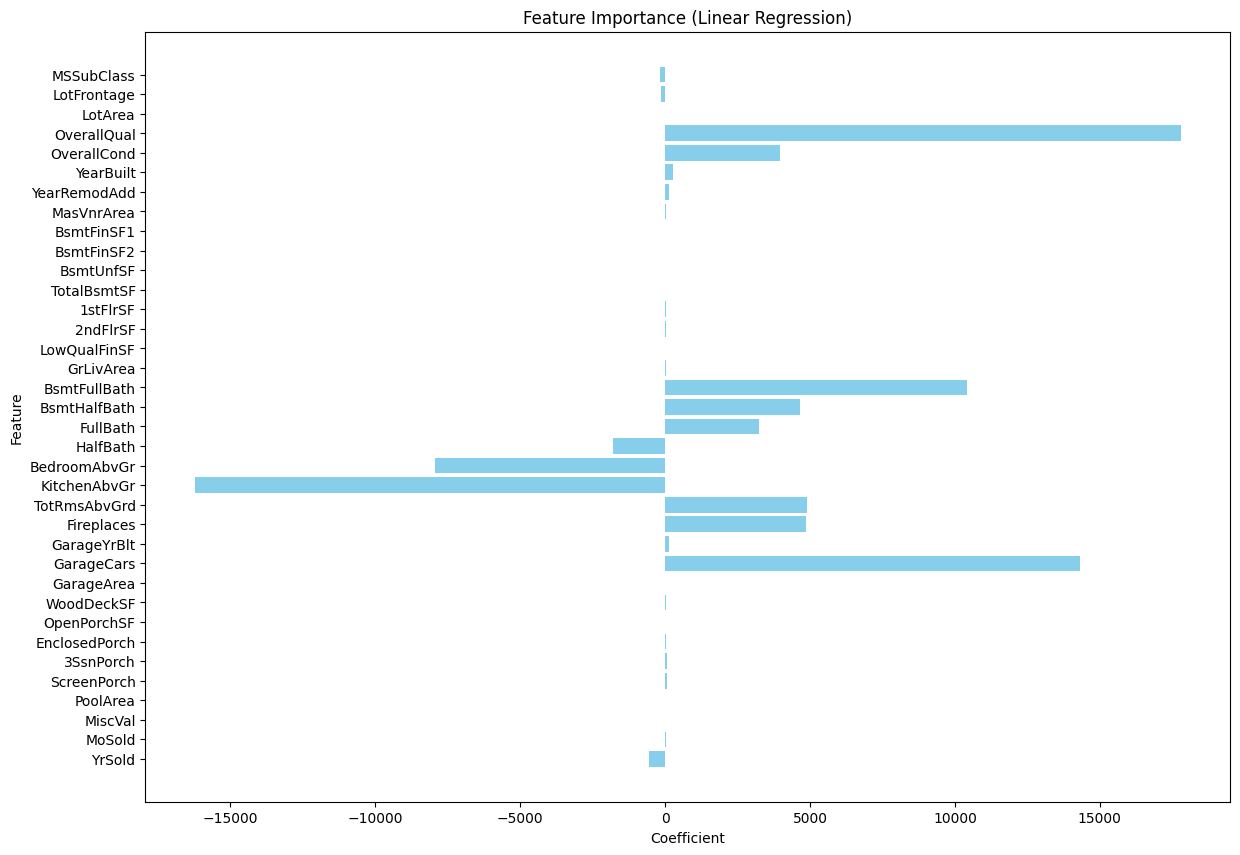

In [24]:
coefficients = LinearReg.coef_
features = X.columns
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
})

feature_importance['Importance'] = round(feature_importance['Coefficient'],3)

plt.figure(figsize=(14, 10))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()
plt.show()


**The above visualization depicts which feature has more significance on training the model**

**Preparing the data for testing**

In [25]:
# Assuming test_data are already provided separately
# Preparing test dataset (test_data)
X_test_data = test_data.drop(columns=['Id','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])

# Checking the shape
print(X_test_data.shape)

(1459, 36)


**check if null values exists**

In [26]:
X_test_data.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

**Dropping the null values**

In [27]:
X_test_data = X_test_data.dropna()

In [28]:
X_test_data.shape

(1146, 36)

**Prediction using test data**

In [29]:
Test_data_prediction = LinearReg.predict(X_test_data)

**Merging in the dataframe to understand the data as whole for better understanding**

In [30]:
# Create a copy of X_test_data
X_test_copy = X_test_data.copy()

# Convert predictions to DataFrame
predicted_prices = pd.DataFrame(Test_data_prediction, columns=["Predicted SalePrice"])

# Reset index to align both DataFrames
X_test_copy = X_test_copy.reset_index(drop=True)
predicted_prices = predicted_prices.reset_index(drop=True)

# Merge test dataset with predictions
final_test_predictions = pd.concat([X_test_copy, predicted_prices], axis=1)

# Display the first few rows
print(final_test_predictions.head())


   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0    11622            5            6       1961   
1          20         81.0    14267            6            6       1958   
2          60         74.0    13830            5            5       1997   
3          60         78.0     9978            6            6       1998   
4         120         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          1961         0.0       468.0       144.0  ...         140   
1          1958       108.0       923.0         0.0  ...         393   
2          1998         0.0       791.0         0.0  ...         212   
3          1998        20.0       602.0         0.0  ...         360   
4          1992         0.0       263.0         0.0  ...           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0            0              0     

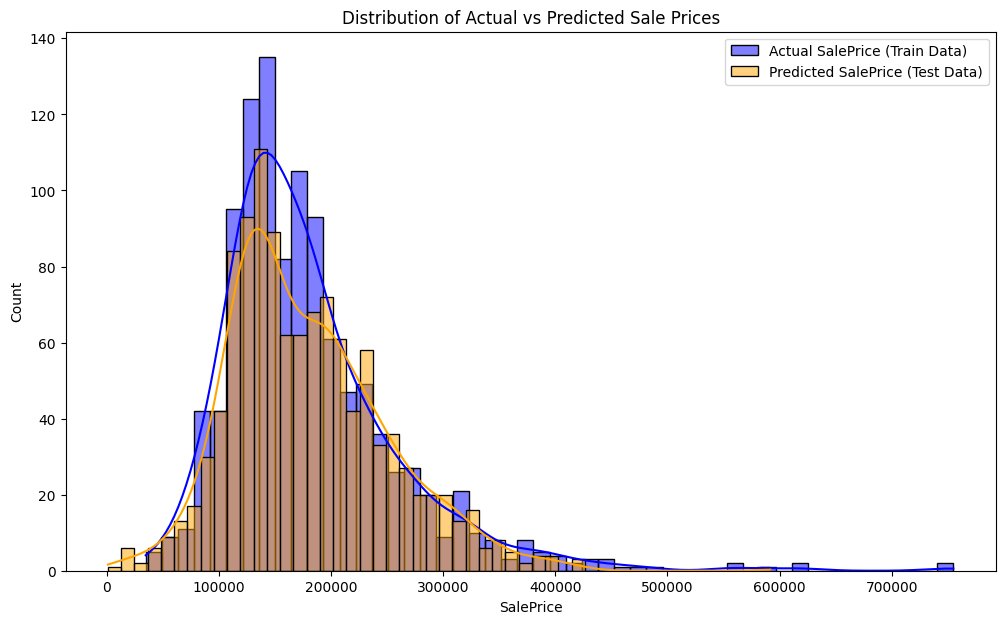

In [31]:
# plotting the KDE graph over the actual prices to see if distribution overlap is there or not

plt.figure(figsize=(12,7))
sns.histplot(y_train, bins=50, kde=True, color="blue", label="Actual SalePrice (Train Data)")
sns.histplot(Test_data_prediction, bins=50, kde=True, color="orange", label="Predicted SalePrice (Test Data)")
plt.legend()
plt.title("Distribution of Actual vs Predicted Sale Prices")
plt.show()

**The model captures the overall distribution of house prices well but tends to slightly underestimate prices, especially for expensive homes. The predicted values follow the actual trend but show some deviation, suggesting possible underfitting. The model performs reasonably well for mid-range prices but may need improvements (e.g., feature engineering or advanced models) for better accuracy.**

**2.Ridge Regression**

In [32]:
# dividing training data
X = train_data.drop(columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition','SalePrice'])
Y = train_data["SalePrice"]
Ridge_x_train, Ridge_x_test, Ridge_y_train, Ridge_y_test = train_test_split(X,Y, test_size=0.25, random_state=1111)
print(Ridge_x_train.shape)
print(Ridge_x_test.shape)
print(Ridge_y_train.shape)
print(Ridge_y_test.shape)

(1095, 36)
(365, 36)
(1095,)
(365,)


In [33]:
Ridge_Regression = Ridge()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              'solver': ['auto', 'sparse_cg', 'sag', 'lsqr'],
              'fit_intercept': [True, False]}

grid_search_cv = GridSearchCV(estimator=Ridge_Regression, param_grid=parameters, cv = 5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_cv.fit(Ridge_x_train, Ridge_y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'sparse_cg', 'sag', 'lsqr']},
             scoring='neg_mean_squared_error')

In [34]:
best_params = grid_search_cv.best_params_
print("Best parameter values are:", best_params)

Best parameter values are: {'alpha': 10.0, 'fit_intercept': False, 'solver': 'auto'}


In [35]:
Ridge_Regression_Best = Ridge(**best_params)
Ridge_Regression_Best.fit(Ridge_x_train, Ridge_y_train)

Ridge(alpha=10.0, fit_intercept=False)

In [36]:
Ridge_y_pred = Ridge_Regression_Best.predict(Ridge_x_test)
# Calculate MSE
Ridge_mse = mean_squared_error(Ridge_y_test, Ridge_y_pred)
print(f"Mean Squared Error (MSE): {Ridge_mse}")

# Calculate RMSE
Ridge_rmse = np.sqrt(Ridge_mse)
print(f"Root Mean Squared Error (RMSE): {Ridge_rmse}")

# Calculate MAE
Ridge_mae = mean_absolute_error(Ridge_y_test, Ridge_y_pred)
print(f"Mean Absolute Error (MAE): {Ridge_mae}")

# Calculate R-squared
Ridge_r2 = r2_score(Ridge_y_test, Ridge_y_pred)
print(f"R-squared (R2): {Ridge_r2}")

Mean Squared Error (MSE): 894088593.6393712
Root Mean Squared Error (RMSE): 29901.314246022215
Mean Absolute Error (MAE): 21280.322063466356
R-squared (R2): 0.8529859939024647


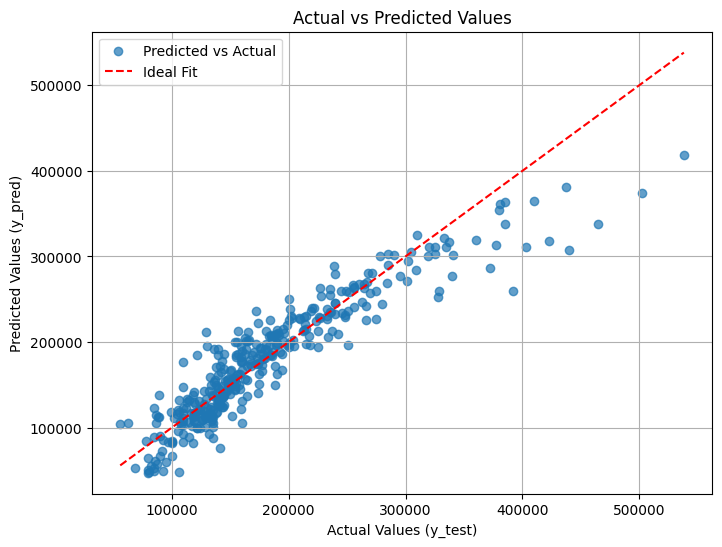

In [37]:
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted
plt.scatter(Ridge_y_test, Ridge_y_pred, alpha=0.7, label="Predicted vs Actual")

# Add the ideal best-fit line (diagonal line y = x)
plt.plot([Ridge_y_test.min(), Ridge_y_test.max()], [Ridge_y_test.min(), Ridge_y_test.max()], color="red", linestyle="--", label="Ideal Fit")

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()

**The scatter plot demonstrates a strong positive correlation between actual and predicted values, indicating that the model performs well in capturing the underlying pattern. The majority of points lie close to the red ideal fit line, suggesting that predictions are generally accurate. However, some dispersion around the line indicates minor prediction errors, which could be due to model bias, variance, or noise in the data.**

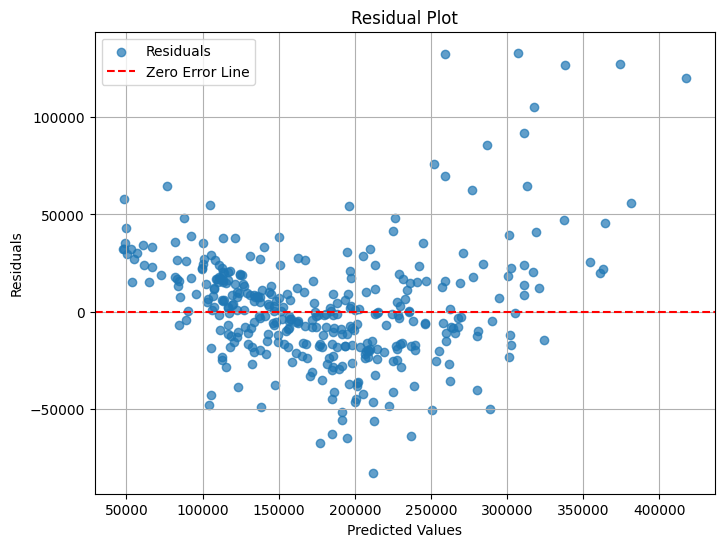

In [38]:
Ridge_residuals = Ridge_y_test - Ridge_y_pred
plt.figure(figsize=(8, 6))

# Residuals plot
plt.scatter(Ridge_y_pred, Ridge_residuals, alpha=0.7, label="Residuals")
plt.axhline(0, color="red", linestyle="--", label="Zero Error Line")

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.grid()
plt.show()

**The residual plot shows the difference between actual and predicted values, helping to assess model accuracy. The residuals are randomly scattered around the zero error line, suggesting that the model does not exhibit strong bias. However, there is some spread in residuals, indicating small prediction errors that could be due to variance in the data. The absence of a clear pattern suggests that the model captures most trends well**

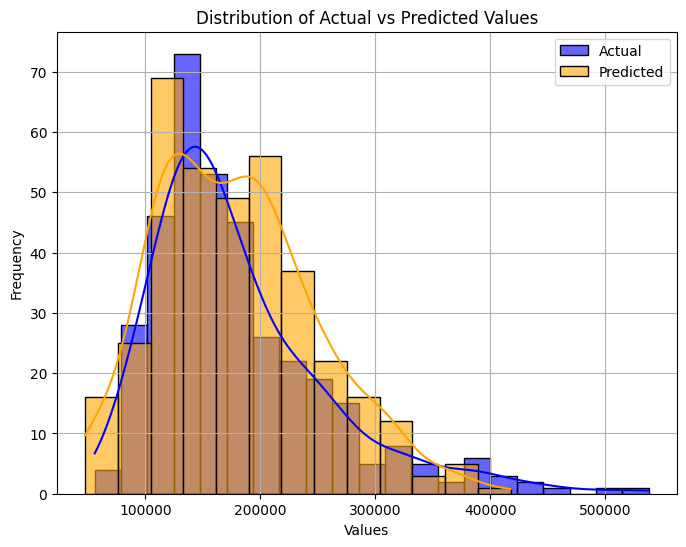

In [39]:
plt.figure(figsize=(8, 6))

sns.histplot(Ridge_y_test, kde=True, color="blue", label="Actual", alpha=0.6)
sns.histplot(Ridge_y_pred, kde=True, color="orange", label="Predicted", alpha=0.6)

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()

**The model captures the overall distribution of house prices well but tends to slightly underestimate prices, especially for expensive homes. The predicted values follow the actual trend but show some deviation, suggesting possible underfitting. The model performs reasonably well for mid-range prices but may need improvements (e.g., feature engineering or advanced models) for better accuracy.**

**Preparing test data for prediciton**

In [40]:
# Assuming test_data are already provided separately
# Preparing test dataset (test_data)
X_test_data = test_data.drop(columns=['Id','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])

# Checking the shape
print(X_test_data.shape)

(1459, 36)


**Check if null value exsists**

In [41]:
X_test_data.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

**Dropping null values**

In [42]:
X_test_data = X_test_data.dropna()
X_test_data.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [43]:
X_test_data.shape

(1146, 36)

**Prediciting sales price with trained model for test data**

In [44]:
Test_data_Ridge_prediction = Ridge_Regression_Best.predict(X_test_data)

**Merging prices in dataframe for better understanding**

In [45]:
# Create a copy of X_test_data
X_test_copy = X_test_data.copy()

# Convert predictions to DataFrame
predicted_prices = pd.DataFrame(Test_data_Ridge_prediction, columns=["Predicted SalePrice"])

# Reset index to align both DataFrames
X_test_copy = X_test_copy.reset_index(drop=True)
predicted_prices = predicted_prices.reset_index(drop=True)

# Merge test dataset with predictions
final_test_predictions = pd.concat([X_test_copy, predicted_prices], axis=1)

# Display the first few rows
print(final_test_predictions.head())


   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0    11622            5            6       1961   
1          20         81.0    14267            6            6       1958   
2          60         74.0    13830            5            5       1997   
3          60         78.0     9978            6            6       1998   
4         120         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          1961         0.0       468.0       144.0  ...         140   
1          1958       108.0       923.0         0.0  ...         393   
2          1998         0.0       791.0         0.0  ...         212   
3          1998        20.0       602.0         0.0  ...         360   
4          1992         0.0       263.0         0.0  ...           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0            0              0     

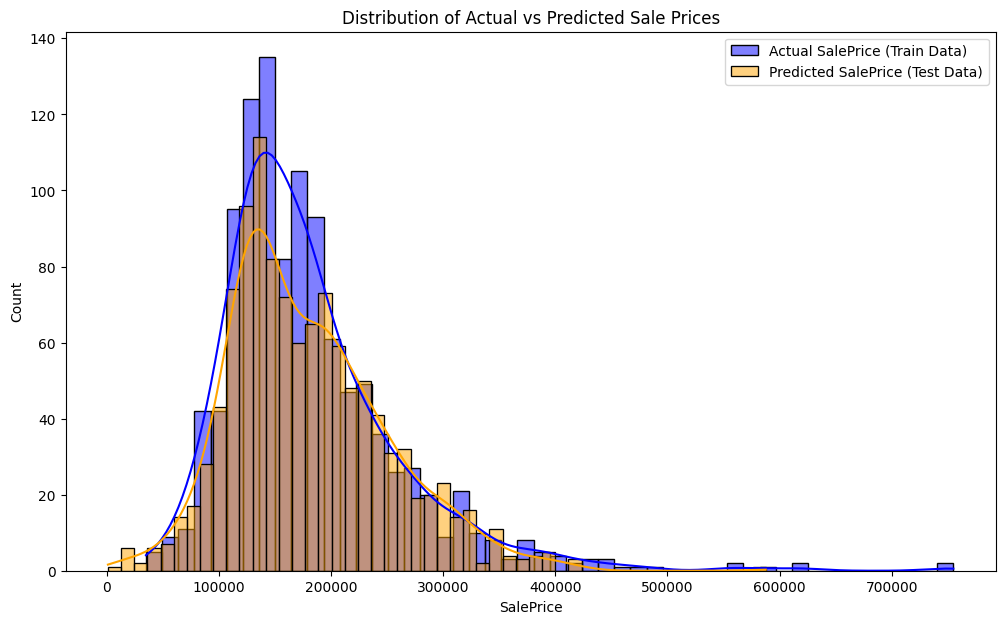

In [46]:
# plotting the KDE graph over the actual prices to see if distribution overlap is there or not

plt.figure(figsize=(12,7))
sns.histplot(Ridge_y_train, bins=50, kde=True, color="blue", label="Actual SalePrice (Train Data)")
sns.histplot(Test_data_Ridge_prediction, bins=50, kde=True, color="orange", label="Predicted SalePrice (Test Data)")
plt.legend()
plt.title("Distribution of Actual vs Predicted Sale Prices")
plt.show()

**The model captures the overall distribution of house prices well but tends to slightly underestimate prices, especially for expensive homes. The predicted values follow the actual trend but show some deviation, suggesting possible underfitting. The model performs reasonably well for mid-range prices but may need improvements (e.g., feature engineering or advanced models) for better accuracy.**

**3. Lasso Regression**

In [47]:
# dividing training data
X = train_data.drop(columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition','SalePrice'])
Y = train_data["SalePrice"]
Lasso_x_train, Lasso_x_test, Lasso_y_train, Lasso_y_test = train_test_split(X,Y, test_size=0.25, random_state=1111)
print(Lasso_x_train.shape)
print(Lasso_x_test.shape)
print(Lasso_y_train.shape)
print(Lasso_y_test.shape)

(1095, 36)
(365, 36)
(1095,)
(365,)


In [48]:
Lasso_Regression = Lasso()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              'max_iter': [1000, 2000, 4000, 6000, 8000, 10000],
              'fit_intercept': [True, False],
              'tol': [0.0001, 0.001, 0.01, 0.1, 1.0] }

Lasso_grid_search_cv = GridSearchCV(estimator=Lasso_Regression, param_grid=parameters, cv = 5, n_jobs=-1, scoring='neg_mean_squared_error')
Lasso_grid_search_cv.fit(Lasso_x_train, Lasso_y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 4000, 6000, 8000, 10000],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1.0]},
             scoring='neg_mean_squared_error')

In [49]:
Lasso_best_params = Lasso_grid_search_cv.best_params_
print("Best parameter values are:", Lasso_best_params)

Best parameter values are: {'alpha': 0.0001, 'fit_intercept': True, 'max_iter': 1000, 'tol': 0.01}


In [50]:
Lasso_Regression_Best = Lasso(**Lasso_best_params)
Lasso_Regression_Best.fit(Lasso_x_train, Lasso_y_train)

Lasso(alpha=0.0001, tol=0.01)

In [51]:
Lasso_y_pred = Lasso_Regression_Best.predict(Lasso_x_test)
# Calculate MSE
Lasso_mse = mean_squared_error(Lasso_y_test, Lasso_y_pred)
print(f"Mean Squared Error (MSE): {Lasso_mse}")

# Calculate RMSE
Lasso_rmse = np.sqrt(Lasso_mse)
print(f"Root Mean Squared Error (RMSE): {Lasso_rmse}")

# Calculate MAE
Lasso_mae = mean_absolute_error(Lasso_y_test, Lasso_y_pred)
print(f"Mean Absolute Error (MAE): {Lasso_mae}")

# Calculate R-squared
Lasso_r2 = r2_score(Lasso_y_test, Lasso_y_pred)
print(f"R-squared (R2): {Lasso_r2}")

Mean Squared Error (MSE): 899975174.8724248
Root Mean Squared Error (RMSE): 29999.586245020528
Mean Absolute Error (MAE): 21395.51131025158
R-squared (R2): 0.8520180698114447


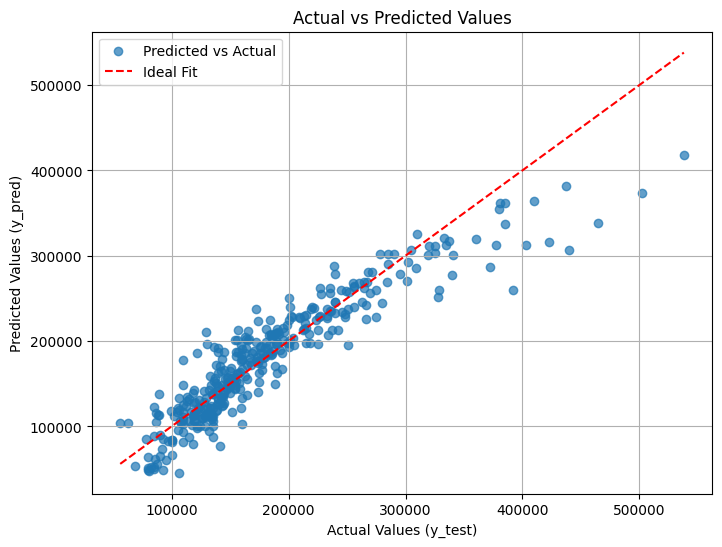

In [52]:
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted
plt.scatter(Lasso_y_test, Lasso_y_pred, alpha=0.7, label="Predicted vs Actual")

# Add the ideal best-fit line (diagonal line y = x)
plt.plot([Lasso_y_test.min(), Lasso_y_test.max()], [Lasso_y_test.min(), Lasso_y_test.max()], color="red", linestyle="--", label="Ideal Fit")

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()

**The scatter plot demonstrates a strong positive correlation between actual and predicted values, indicating that the model performs well in capturing the underlying pattern. The majority of points lie close to the red ideal fit line, suggesting that predictions are generally accurate. However, some dispersion around the line indicates minor prediction errors, which could be due to model bias, variance, or noise in the data.**

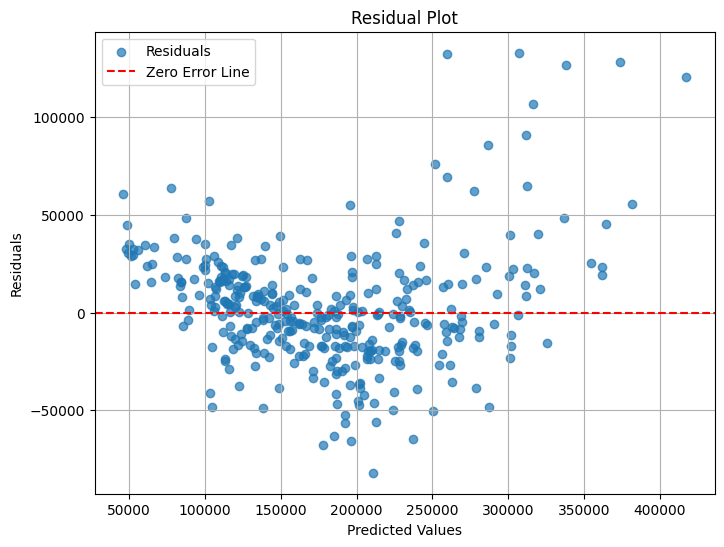

In [53]:
Lasso_residuals = Lasso_y_test - Lasso_y_pred
plt.figure(figsize=(8, 6))

# Residuals plot
plt.scatter(Lasso_y_pred, Lasso_residuals, alpha=0.7, label="Residuals")
plt.axhline(0, color="red", linestyle="--", label="Zero Error Line")

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.grid()
plt.show()

**The residual plot shows the difference between actual and predicted values, helping to assess model accuracy. The residuals are randomly scattered around the zero error line, suggesting that the model does not exhibit strong bias. However, there is some spread in residuals, indicating small prediction errors that could be due to variance in the data. The absence of a clear pattern suggests that the model captures most trends well**


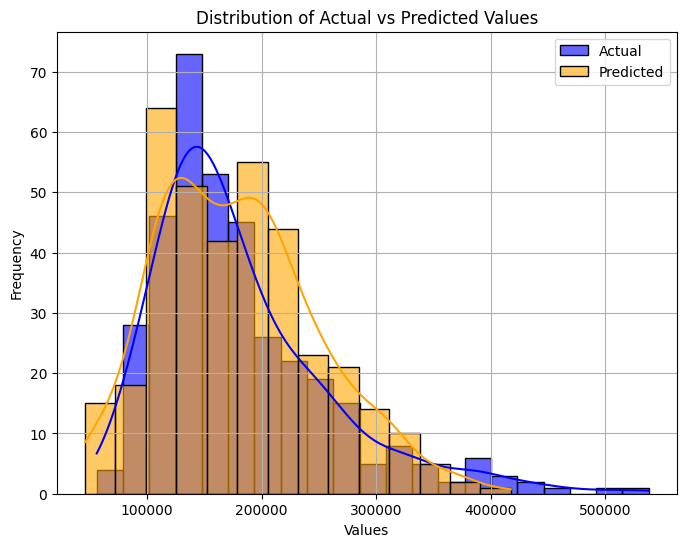

In [54]:
plt.figure(figsize=(8, 6))

sns.histplot(Lasso_y_test, kde=True, color="blue", label="Actual", alpha=0.6)
sns.histplot(Lasso_y_pred, kde=True, color="orange", label="Predicted", alpha=0.6)

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()

**The model does a great job capturing the overall trend of house prices, with predicted values (orange) closely following actual values (blue). It successfully learns the distribution, though there are slight deviations—some overestimation at lower prices and underestimation at higher prices.**

**Preparing the test data for prediction**

In [55]:
# Assuming test_data are already provided separately
# Preparing test dataset (test_data)
X_test_data = test_data.drop(columns=['Id','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])

# Checking the shape
print(X_test_data.shape)

(1459, 36)


**Check if null value exists**

In [56]:
X_test_data.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

**Dropping null values**

In [57]:
X_test_data = X_test_data.dropna()
X_test_data.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [58]:
X_test_data.shape

(1146, 36)

**Building model to predict sales price from testing data**

In [59]:
Test_data_Lasso_prediction = Lasso_Regression_Best.predict(X_test_data)

**Merging the sales price into the dataframe for better understanding**

In [60]:
# Create a copy of X_test_data
X_test_copy = X_test_data.copy()

# Convert predictions to DataFrame
predicted_prices = pd.DataFrame(Test_data_Lasso_prediction, columns=["Predicted SalePrice"])

# Reset index to align both DataFrames
X_test_copy = X_test_copy.reset_index(drop=True)
predicted_prices = predicted_prices.reset_index(drop=True)

# Merge test dataset with predictions
final_test_predictions = pd.concat([X_test_copy, predicted_prices], axis=1)

# Display the first few rows
print(final_test_predictions.head())


   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0    11622            5            6       1961   
1          20         81.0    14267            6            6       1958   
2          60         74.0    13830            5            5       1997   
3          60         78.0     9978            6            6       1998   
4         120         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          1961         0.0       468.0       144.0  ...         140   
1          1958       108.0       923.0         0.0  ...         393   
2          1998         0.0       791.0         0.0  ...         212   
3          1998        20.0       602.0         0.0  ...         360   
4          1992         0.0       263.0         0.0  ...           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0            0              0     

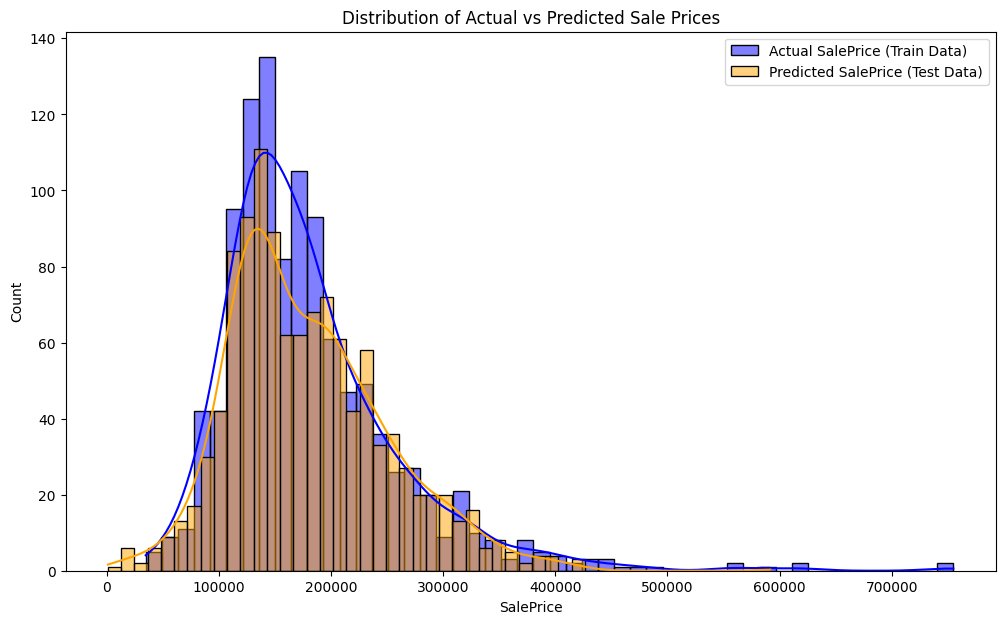

In [61]:
# plotting the KDE graph over the actual prices to see if distribution overlap is there or not

plt.figure(figsize=(12,7))
sns.histplot(Lasso_y_train, bins=50, kde=True, color="blue", label="Actual SalePrice (Train Data)")
sns.histplot(Test_data_Lasso_prediction, bins=50, kde=True, color="orange", label="Predicted SalePrice (Test Data)")
plt.legend()
plt.title("Distribution of Actual vs Predicted Sale Prices")
plt.show()

**The model captures the overall distribution of house prices well but tends to slightly underestimate prices, especially for expensive homes. The predicted values follow the actual trend but show some deviation, suggesting possible underfitting. The model performs reasonably well for mid-range prices but may need improvements (e.g., feature engineering or advanced models) for better accuracy.**

**4. ElasticNet**

In [62]:
# dividing training data
X = train_data.drop(columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition','SalePrice'])
Y = train_data["SalePrice"]
Elastic_x_train, Elastic_x_test, Elastic_y_train, Elastic_y_test = train_test_split(X,Y, test_size=0.25, random_state=1111)
print(Elastic_x_train.shape)
print(Elastic_x_test.shape)
print(Elastic_y_train.shape)
print(Elastic_y_test.shape)

(1095, 36)
(365, 36)
(1095,)
(365,)


In [63]:
Elastic_Net_Regression = ElasticNet()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
              'l1_ratio': [0.05, 0.25, 0.50, 0.75, 0.95] }
Elastic_grid_search_cv = GridSearchCV(estimator=Elastic_Net_Regression, param_grid=parameters, cv = 5, n_jobs=-1, scoring='neg_mean_squared_error')
Elastic_grid_search_cv.fit(Elastic_x_train, Elastic_y_train)

c:\Users\reshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.002e+11, tolerance: 6.988e+08
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'l1_ratio': [0.05, 0.25, 0.5, 0.75, 0.95]},
             scoring='neg_mean_squared_error')

In [64]:
Elastic_best_params = Elastic_grid_search_cv.best_params_
print("Best parameter values are:", Elastic_best_params)

Best parameter values are: {'alpha': 0.1, 'l1_ratio': 0.5}


In [65]:
Elastic_Regression_Best = ElasticNet(**Elastic_best_params)
Elastic_Regression_Best.fit(Elastic_x_train, Elastic_y_train)

c:\Users\reshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.002e+11, tolerance: 6.988e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.1)

In [66]:
Elastic_y_pred = Elastic_Regression_Best.predict(Elastic_x_test)
# Calculate MSE
Elastic_mse = mean_squared_error(Elastic_y_test, Elastic_y_pred)
print(f"Mean Squared Error (MSE): {Elastic_mse}")

# Calculate RMSE
Elastic_rmse = np.sqrt(Elastic_mse)
print(f"Root Mean Squared Error (RMSE): {Elastic_rmse}")

# Calculate MAE
Elastic_mae = mean_absolute_error(Elastic_y_test, Elastic_y_pred)
print(f"Mean Absolute Error (MAE): {Elastic_mae}")

# Calculate R-squared
Elastic_r2 = r2_score(Elastic_y_test, Elastic_y_pred)
print(f"R-squared (R2): {Elastic_r2}")

Mean Squared Error (MSE): 885387494.2052759
Root Mean Squared Error (RMSE): 29755.461586157184
Mean Absolute Error (MAE): 21054.693736088175
R-squared (R2): 0.8544167061320576


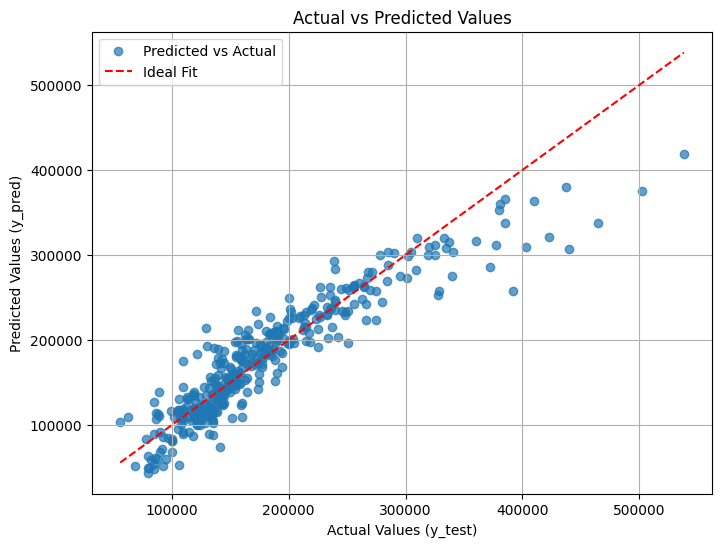

In [67]:
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted
plt.scatter(Elastic_y_test, Elastic_y_pred, alpha=0.7, label="Predicted vs Actual")

# Add the ideal best-fit line (diagonal line y = x)
plt.plot([Elastic_y_test.min(), Elastic_y_test.max()], [Elastic_y_test.min(), Elastic_y_test.max()], color="red", linestyle="--", label="Ideal Fit")

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()

**The scatter plot demonstrates a strong positive correlation between actual and predicted values, indicating that the model performs well in capturing the underlying pattern. The majority of points lie close to the red ideal fit line, suggesting that predictions are generally accurate. However, some dispersion around the line indicates minor prediction errors, which could be due to model bias, variance, or noise in the data.**


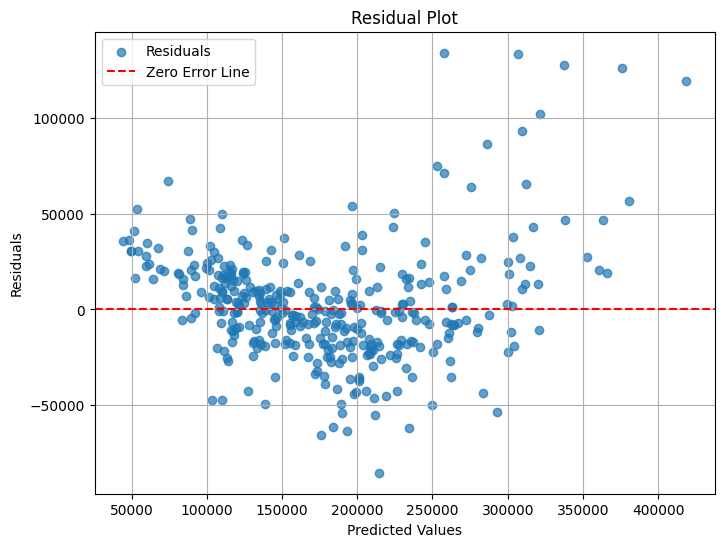

In [68]:
Elastic_residuals = Elastic_y_test - Elastic_y_pred
plt.figure(figsize=(8, 6))

# Residuals plot
plt.scatter(Elastic_y_pred, Elastic_residuals, alpha=0.7, label="Residuals")
plt.axhline(0, color="red", linestyle="--", label="Zero Error Line")

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.grid()
plt.show()

**The residual plot shows the difference between actual and predicted values, helping to assess model accuracy. The residuals are randomly scattered around the zero error line, suggesting that the model does not exhibit strong bias. However, there is some spread in residuals, indicating small prediction errors that could be due to variance in the data. The absence of a clear pattern suggests that the model captures most trends well**


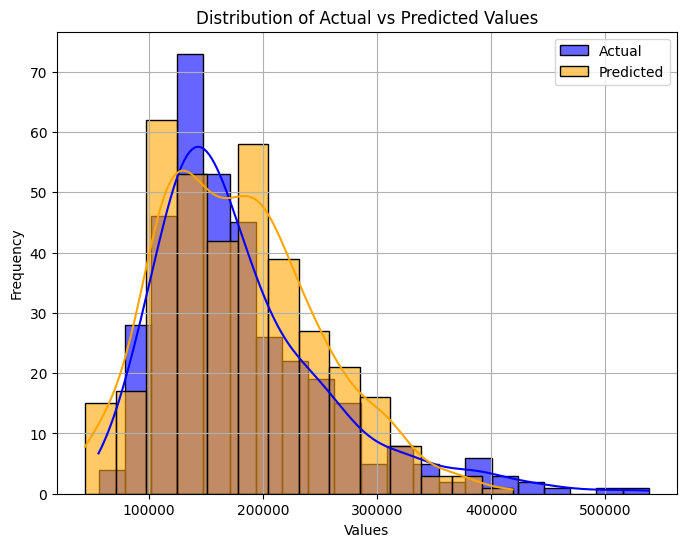

In [69]:
plt.figure(figsize=(8, 6))

sns.histplot(Elastic_y_test, kde=True, color="blue", label="Actual", alpha=0.6)
sns.histplot(Elastic_y_pred, kde=True, color="orange", label="Predicted", alpha=0.6)

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()

**The model does a great job capturing the overall trend of house prices, with predicted values (orange) closely following actual values (blue). It successfully learns the distribution, though there are slight deviations—some overestimation at lower prices and underestimation at higher prices.**


**Preparing the test data for prediction**

In [70]:
# Assuming test_data are already provided separately
# Preparing test dataset (test_data)
X_test_data = test_data.drop(columns=['Id','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])

# Checking the shape
print(X_test_data.shape)

(1459, 36)


**Check if null values exists**

In [71]:
X_test_data.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

**Dropping null values**

In [72]:
X_test_data = X_test_data.dropna()
X_test_data.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

**Predicting using the model for the sales prices in test data**

In [73]:
Test_data_Elastic_prediction = Elastic_Regression_Best.predict(X_test_data)

**Merging it in dataframe to make it easily understandable**

In [74]:
# Create a copy of X_test_data
X_test_copy = X_test_data.copy()

# Convert predictions to DataFrame
predicted_prices = pd.DataFrame(Test_data_Elastic_prediction, columns=["Predicted SalePrice"])

# Reset index to align both DataFrames
X_test_copy = X_test_copy.reset_index(drop=True)
predicted_prices = predicted_prices.reset_index(drop=True)

# Merge test dataset with predictions
final_test_predictions = pd.concat([X_test_copy, predicted_prices], axis=1)

# Display the first few rows
print(final_test_predictions.head())


   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0    11622            5            6       1961   
1          20         81.0    14267            6            6       1958   
2          60         74.0    13830            5            5       1997   
3          60         78.0     9978            6            6       1998   
4         120         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          1961         0.0       468.0       144.0  ...         140   
1          1958       108.0       923.0         0.0  ...         393   
2          1998         0.0       791.0         0.0  ...         212   
3          1998        20.0       602.0         0.0  ...         360   
4          1992         0.0       263.0         0.0  ...           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0            0              0     

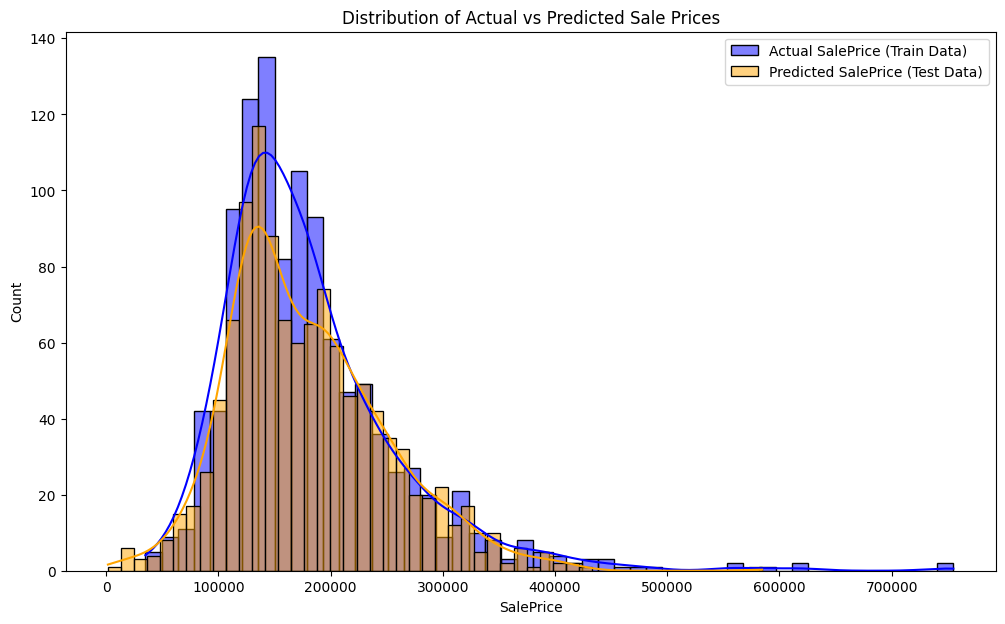

In [75]:
# plotting the KDE graph over the actual prices to see if distribution overlap is there or not

plt.figure(figsize=(12,7))
sns.histplot(Elastic_y_train, bins=50, kde=True, color="blue", label="Actual SalePrice (Train Data)")
sns.histplot(Test_data_Elastic_prediction, bins=50, kde=True, color="orange", label="Predicted SalePrice (Test Data)")
plt.legend()
plt.title("Distribution of Actual vs Predicted Sale Prices")
plt.show()

**The model captures the overall distribution of house prices well but tends to slightly underestimate prices, especially for expensive homes. The predicted values follow the actual trend but show some deviation, suggesting possible underfitting. The model performs reasonably well for mid-range prices but may need improvements (e.g., feature engineering or advanced models) for better accuracy.**

**5.Polynomial regression**

In [76]:
# dividing training data
X = train_data.drop(columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition','SalePrice'])
Y = train_data["SalePrice"]
Poly_x_train, Poly_x_test, Poly_y_train, Poly_y_test = train_test_split(X,Y, test_size=0.25, random_state=1111)
print(Poly_x_train.shape)
print(Poly_x_test.shape)
print(Poly_y_train.shape)
print(Poly_y_test.shape)

(1095, 36)
(365, 36)
(1095,)
(365,)


In [77]:
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()), 
    ('ridge_regression', Ridge(alpha=1.0)) #('linear_regression', LinearRegression())       
])

# I have played with multiple values and the results for anything above were horrific
parameters = {'polynomial_features__degree':[1, 2, 3],'ridge_regression__alpha': [0.1, 1.0, 10.0]}
            #   'linear_regression__fit_intercept': [True, False] }
Poly_grid_search_cv = GridSearchCV(estimator=pipeline, param_grid=parameters, cv = 5, n_jobs=-1, scoring='neg_mean_squared_error')
Poly_grid_search_cv.fit(Poly_x_train, Poly_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [78]:
Poly_best_params = Poly_grid_search_cv.best_params_
print("Best parameter values are:", Poly_best_params)

Best parameter values are: {'polynomial_features__degree': 1, 'ridge_regression__alpha': 10.0}


In [79]:
Best_Poly_model = Poly_grid_search_cv.best_estimator_
Best_Poly_model

Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=1)),
                ('ridge_regression', Ridge(alpha=10.0))])

In [80]:
Poly_y_pred = Best_Poly_model.predict(Poly_x_test)

In [81]:
# Calculate MSE
Poly_mse = mean_squared_error(Poly_y_test, Poly_y_pred)
print(f"Mean Squared Error (MSE): {Poly_mse}")

# Calculate RMSE
Poly_rmse = np.sqrt(Poly_mse)
print(f"Root Mean Squared Error (RMSE): {Poly_rmse}")

# Calculate MAE
Poly_mae = mean_absolute_error(Poly_y_test, Poly_y_pred)
print(f"Mean Absolute Error (MAE): {Poly_mae}")

# Calculate R-squared
Poly_r2 = r2_score(Poly_y_test, Poly_y_pred)
print(f"R-squared (R2): {Poly_r2}")

Mean Squared Error (MSE): 893880692.3467116
Root Mean Squared Error (RMSE): 29897.83758646621
Mean Absolute Error (MAE): 21277.962642453975
R-squared (R2): 0.8530201788838236


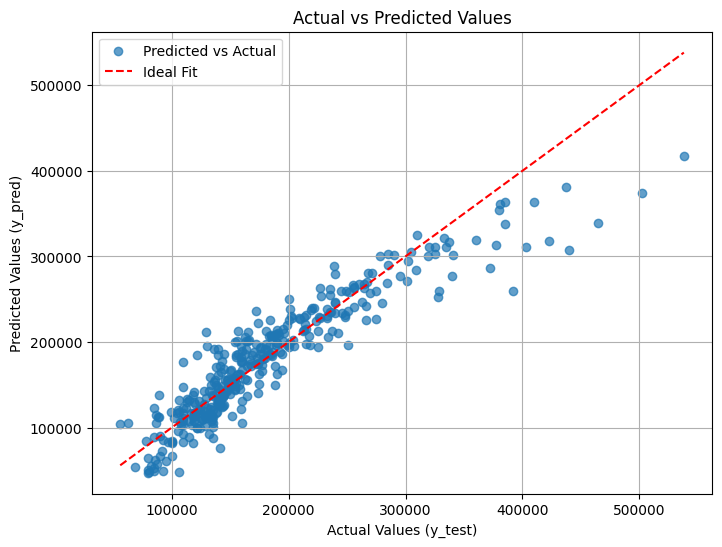

In [82]:
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted
plt.scatter(Poly_y_test, Poly_y_pred, alpha=0.7, label="Predicted vs Actual")

# Add the ideal best-fit line (diagonal line y = x)
plt.plot([Poly_y_test.min(), Poly_y_test.max()], [Poly_y_test.min(), Poly_y_test.max()], color="red", linestyle="--", label="Ideal Fit")

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()

**The scatter plot demonstrates a strong positive correlation between actual and predicted values, indicating that the model performs well in capturing the underlying pattern. The majority of points lie close to the red ideal fit line, suggesting that predictions are generally accurate. However, some dispersion around the line indicates minor prediction errors, which could be due to model bias, variance, or noise in the data.**

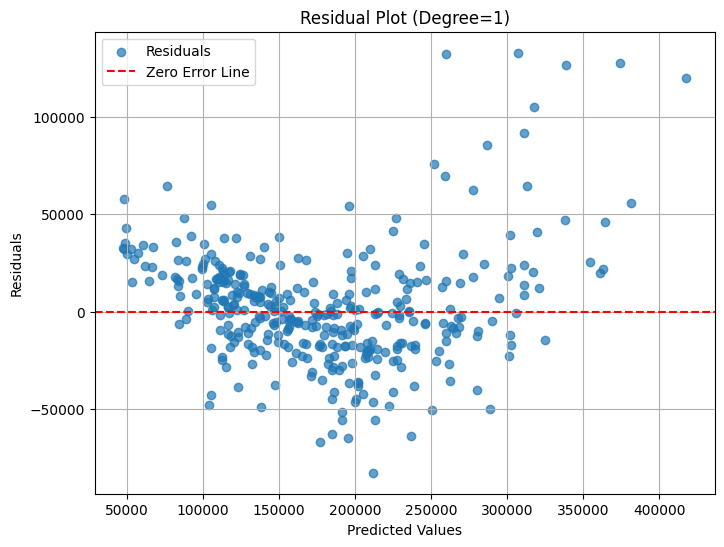

In [83]:
residuals = Poly_y_test - Poly_y_pred
plt.figure(figsize=(8, 6))
plt.scatter(Poly_y_pred, residuals, alpha=0.7, label="Residuals")
plt.axhline(0, color="red", linestyle="--", label="Zero Error Line")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title(f"Residual Plot (Degree={Poly_best_params['polynomial_features__degree']})")
plt.legend()
plt.grid()
plt.show()

**The residual plot shows the difference between actual and predicted values, helping to assess model accuracy. The residuals are randomly scattered around the zero error line, suggesting that the model does not exhibit strong bias. However, there is some spread in residuals, indicating small prediction errors that could be due to variance in the data. The absence of a clear pattern suggests that the model captures most trends well**

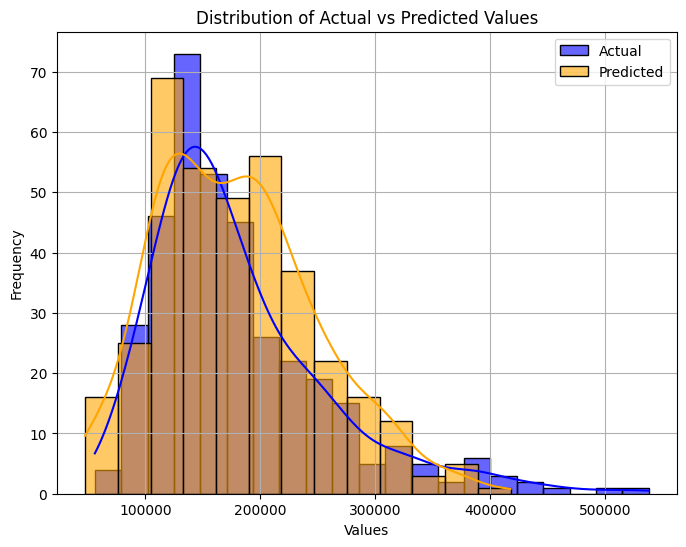

In [84]:
plt.figure(figsize=(8, 6))

sns.histplot(Poly_y_test, kde=True, color="blue", label="Actual", alpha=0.6)
sns.histplot(Poly_y_pred, kde=True, color="orange", label="Predicted", alpha=0.6)

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()

**The model does a great job capturing the overall trend of house prices, with predicted values (orange) closely following actual values (blue). It successfully learns the distribution, though there are slight deviations—some overestimation at lower prices and underestimation at higher prices.**


**Preparing the test data for prediction**

In [85]:
# Assuming test_data are already provided separately
# Preparing test dataset (test_data)
X_test_data = test_data.drop(columns=['Id','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])

# Checking the shape
print(X_test_data.shape)

(1459, 36)


**Checking if null value exists**

In [86]:
X_test_data.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

**Dropping the null values**

In [87]:
X_test_data = X_test_data.dropna()
X_test_data.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

**Predicting using test data for sales price**

In [88]:
Test_data_Poly_prediction = Best_Poly_model.predict(X_test_data)

**Merginig it into the dataframe for better understanding**

In [89]:
# Create a copy of X_test_data
X_test_copy = X_test_data.copy()

# Convert predictions to DataFrame
predicted_prices = pd.DataFrame(Test_data_Poly_prediction, columns=["Predicted SalePrice"])

# Reset index to align both DataFrames
X_test_copy = X_test_copy.reset_index(drop=True)
predicted_prices = predicted_prices.reset_index(drop=True)

# Merge test dataset with predictions
final_test_predictions = pd.concat([X_test_copy, predicted_prices], axis=1)

# Display the first few rows
print(final_test_predictions.head())


   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0    11622            5            6       1961   
1          20         81.0    14267            6            6       1958   
2          60         74.0    13830            5            5       1997   
3          60         78.0     9978            6            6       1998   
4         120         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          1961         0.0       468.0       144.0  ...         140   
1          1958       108.0       923.0         0.0  ...         393   
2          1998         0.0       791.0         0.0  ...         212   
3          1998        20.0       602.0         0.0  ...         360   
4          1992         0.0       263.0         0.0  ...           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0            0              0     

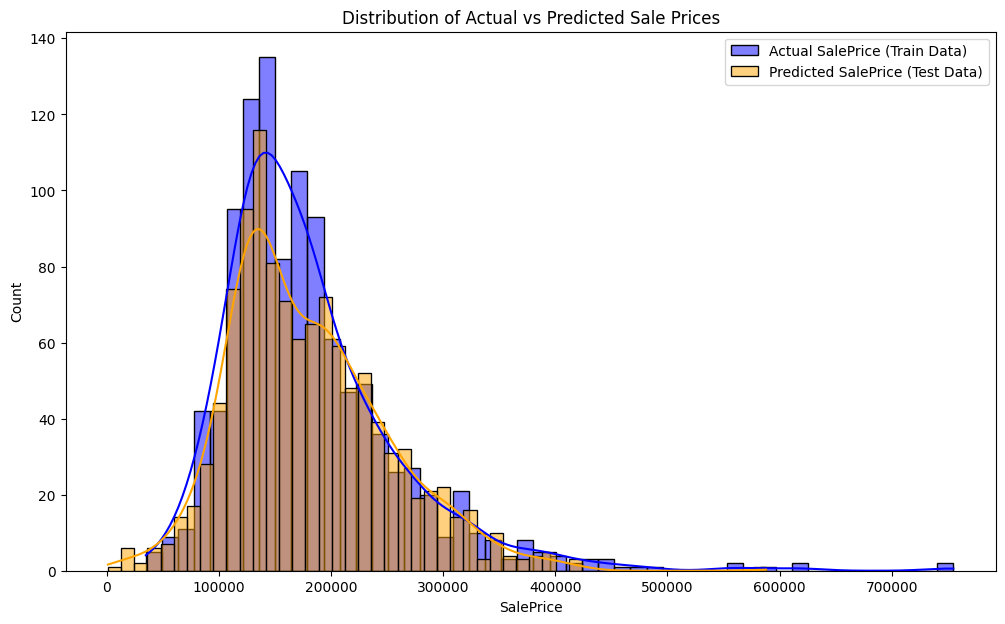

In [90]:
# plotting the KDE graph over the actual prices to see if distribution overlap is there or not

plt.figure(figsize=(12,7))
sns.histplot(Poly_y_train, bins=50, kde=True, color="blue", label="Actual SalePrice (Train Data)")
sns.histplot(Test_data_Poly_prediction, bins=50, kde=True, color="orange", label="Predicted SalePrice (Test Data)")
plt.legend()
plt.title("Distribution of Actual vs Predicted Sale Prices")
plt.show()

**The model captures the overall distribution of house prices well but tends to slightly underestimate prices, especially for expensive homes. The predicted values follow the actual trend but show some deviation, suggesting possible underfitting. The model performs reasonably well for mid-range prices but may need improvements (e.g., feature engineering or advanced models) for better accuracy.**